# Instalando dependências

In [ ]:
%pip install numpy
%pip install matplotlib
%pip install scipy


# Importando bibliotecas

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Questão 1 - Modelo SIR

### Definição dos parâmetros β e ν relacionados às taxas de infecção e recuperação, respectivamente

In [19]:
beta = 0.8
nu = 0.3125

### Definição do sistema de equações diferenciais do modelo SIR

In [20]:
def SIR(t, y):
    S, I, R = y
    dS = -beta * I * S
    dI = beta * I * S - nu * I
    dR = nu * I
    return [dS, dI, dR]

### Definição das condições de valor inicial para cada métrica

In [21]:
S0 = 0.99
I0 = 0.01
R0 = 0
y0 = [S0, I0, R0]

## a) Para calcular a porcentagem de indivíduos susceptíveis, infectados e recuperados em t = 50 usa-se a função *solve_ivp* da biblioteca *scipy* que por padrão utiliza o método de Runge-Kutta de 4ª ordem (RK45), o qual indica que esses resultados são respectivamente
$$S(50) = 10.4188 \%$$
$$I(50) = 0.0062 \%$$
$$R(50) = 89.5750 \%$$

In [22]:
# Intervalo de tempo
t_span = (0, 50)
t_eval = np.linspace(0, 50, 500)

# Resolução numérica com método de Runge-Kutta (4/5)
sol = solve_ivp(SIR, t_span, y0, t_eval=t_eval)

S, I, R = sol.y
t = sol.t

# (a) Valores em t=50
S50, I50, R50 = S[-1], I[-1], R[-1]
print(f"Porcentagem de indivíduos susceptíveis: S(50) = {S50*100:.4f}%\nPorcentagem de indivíduos infectados: I(50) = {I50*100:.4f}%\nPorcentagem de indivíduos recuperados R(50) = {R50*100:.4f}%")


Porcentagem de indivíduos susceptíveis: S(50) = 10.4188%
Porcentagem de indivíduos infectados: I(50) = 0.0062%
Porcentagem de indivíduos recuperados R(50) = 89.5750%


## b) Para achar o momento em que houve o maior número de infectados usa-se o método *argmax* da biblioteca *numpy* nas soluções de $I$, a qual indica que o $t^*$ tal que $I(t^*)$ é máximo será:
$$t^* = 10.22, I(t^*) = 24.6035 \%$$

In [23]:
imax = np.argmax(I) # Maior número de infectados
t_star = t[imax]  # Tempo em que isso ocorre
print(f"Máximo de infectados em t* = {t_star:.2f}, I(t*) = {I[imax] * 100:.4f}%")


Máximo de infectados em t* = 10.22, I(t*) = 24.6035%


## c) Apresentando a população de indivíduos susceptíveis, infectados e recuperados em função do tempo, para $t ∈ [0, 50]$

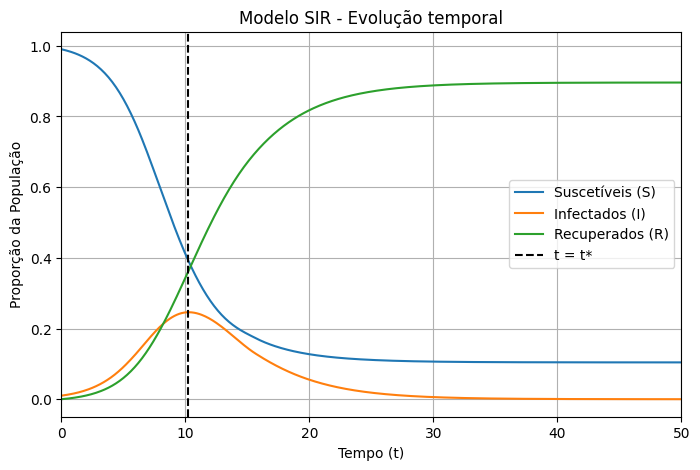

In [24]:
plt.figure(figsize=(8,5))
plt.plot(t, S, label='Suscetíveis (S)')
plt.plot(t, I, label='Infectados (I)')
plt.plot(t, R, label='Recuperados (R)')
plt.xlabel('Tempo (t)')
plt.axvline(t_star, color = 'k', linestyle = '--', label = 't = t*')
plt.ylabel('Proporção da População')
plt.title('Modelo SIR - Evolução temporal')
plt.legend()
plt.grid(True)
plt.xlim(0,50)
plt.show()

# Questão 2 — Problema de valor de contorno

Considerando a equação

$$v'' + sin(x) \cdot v' + v = (1 - cos(x)) \cdot e^{cos(x)}$$

Tal que
$$v'(0) = 0, v(4𝜋) = e$$

## a) Para encontrar o sistema de equações lineares pelo método das diferenças finitas com $h = 𝜋$:

1.   Inicialmente, discretiza-se o intervalo $[0,4 \pi]$ com passo $h = \pi$
$$x_i = i \cdot \pi, i = \{0,1,2,3,4\}$$
Obtendo-se desta forma 5 pontos

2.   Aplicando-se aproximações finitas para cada ponto:
$$v''(x_i) ≈ \frac {v_{i-1} - 2v_i + v_{i+1}}{h^2}$$
$$v'(x_i) ≈ \frac {v_{i+1} - v_{i-1}}{2h}$$

3.  Substituindo essas aproximações na EDO:
$$\frac {v_{i-1} - 2v_i + v_{i+1}}{h^2} + sen(x_i) \cdot \frac {v_{i+1} - v_{i-1}}{2h} + v_i = (1 - cos(x_i)) \cdot e^{cos(x_i)}$$

4.  Para as condições de contorno:

$$v(4 \pi) = e \implies v_4 = e \dots (5)$$
$$v'(0) = 0 \implies \frac {v_1 - v_{-1}}{2h} = 0 \implies v_1 = v_{-1}$$

Substituindo esse resultado na aproximação de $v''(x_0)$:
$$v''(0) ≈ \frac {v_1 - 2v_0 + v_1}{h^2} = \frac {2v_1 - 2v_0}{h^2}$$
Aplicando-se esse resultado na equação original avaliada em $x = 0$
$$v''(0) + sen(0) \cdot v'(0) + v_0 = (1 - cos(0))e^{cos(0)}$$
$$\frac {2v_1 - 2v_0}{h^2} + 0 + v_0 = 0 \implies \left(1 - \frac {2}{h^2} \right)v_0 + \frac {2}{h^2}v_1 = 0 \dots (1)$$

5.  Avaliando-se os pontos $x_1, x_2, x_3$ na equação original:
$$x_1: \frac {v_0 - 2v_1 + v_2}{h^2} + sen(\pi) \cdot \frac{v_2 - v_0}{2h} + v_1 = (1 - cos(\pi))e^{cos(\pi)}$$
$$\frac {v_0 - 2v_1 + v_2}{h^2} + v_1 = 2e^{-1} \implies \frac {1}{h^2}v_0 + \left(1 - \frac {2}{h^2} \right)v_1 + \frac {1}{h^2}v_2 = 2e^{-1} \dots (2)$$

$$x_2: \frac{v_1 - 2v_2 + v_3}{h^2} + sen(2 \pi) \cdot \frac {v_3 - v_1}{2h}  + v_2 = (1 - cos(2 \pi))e^{cos(2 \pi)}$$
$$\frac{v_1 - 2v_2 + v_3}{h^2}  + v_2 = 0 \implies \frac {1}{h^2}v_1 + \left(1 - \frac {2}{h^2} \right)v_2 + \frac {1}{h^2}v_3 = 0 \dots (3)$$

$$x_3: \frac{v_2 - 2v_3 + v_4}{h^2} + sen(3 \pi) \cdot \frac {v_4 - v_2}{2h}  + v_3 = (1 - cos(3 \pi))e^{cos(3 \pi)}$$
$$\frac {v_2 - 2v_3 + v_4}{h^2} + v_3 = 2e^{-1} \implies \frac {1}{h^2}v_2 + \left(1 - \frac {2}{h^2} \right)v_3 = 2e^{-1} - \frac {1}{h^2}e \dots (4)$$

Assim, pode-se escrever um sistema linear da forma $Av = b, v = [v_0,v_1,v_2,v_3, v_4]^T$ de modo que, substituindo-se $h = \pi$, obtém-se:
$$A = \begin{pmatrix}
1 - \frac{2}{\pi ^2} & \frac{2}{\pi ^2} & 0 & 0 & 0\\
\frac{1}{\pi ^2} & 1 - \frac{2}{\pi ^2} & \frac{1}{\pi ^2} & 0 & 0\\
0 & \frac{1}{\pi ^2} & 1 - \frac{2}{\pi^2} & \frac {1}{\pi^2} & 0\\
0 & 0 & \frac {1}{\pi^2} & 1 - \frac {2}{\pi^2} & 0\\
0 & 0 & 0 & 0 & 1
\end{pmatrix}$$

$$b = \begin{pmatrix}
0 \\
2e^{-1} \\
0 \\
2e^{-1} - \frac {e}{\pi^2} \\
e
\end{pmatrix}$$

$$Av = b$$




## b) Para encontrar uma aproximação numérica do problema de valor de contorno acima usando o método de diferenças finitas com h = π/16, serão avaliados 65 pontos $(x_i = i \cdot \frac {\pi}{16}, x_0 = 0 \land x_{64} = 4 \pi)$ e usa-se novamente as fórmulas de diferenças finitas, agora com passo menor para obter uma aproximação muito mais precisa

### Definição do Intervalo e do Passo

In [25]:
h = np.pi / 16
x = np.arange(0, 4*np.pi + h, h)
n = len(x)

### Montando o sistema linear $Av = b$

In [26]:
A = np.zeros((n, n))
b = np.zeros(n)

### Definição da condição de contorno $v'(0) = 0$ Que como visto anteriormente
$$v_1 = v_{-1} \implies \left(1 - \frac{2}{h^2} \right)v_0 + \frac {2}{h^2}v_1 = 0 $$

In [27]:
A[0,0] = 1 - 2/(h**2)
A[0,1] = 2/(h**2)
b[0] = 0

### Definição da condição de contorno: $v(4 \pi) = e$

In [28]:
A[-1, -1] = 1
b[-1] = np.e

### Alterando-se os pontos internos

In [29]:
for i in range(1, n-1):
    xi = x[i]
    A[i, i-1] = (1/h**2) - (np.sin(xi)/(2*h))
    A[i, i]   = -2/h**2 + 1
    A[i, i+1] = (1/h**2) + (np.sin(xi)/(2*h))
    b[i] = (1 - np.cos(xi))*np.exp(np.cos(xi))

### Resolvendo-se o sistema a partir das aproximações numéricas explicadas anteriormente obtém-se a seguir o seguinte valor de $v$, o qual armazena as soluções para cada $x_i$

In [31]:
v = np.linalg.solve(A, b)
v

array([2.61931002, 2.56881871, 2.42498854, 2.20859364, 1.94798991,
       1.67240843, 1.40642192, 1.16695411, 0.96291756, 0.79666382,
       0.6661771 , 0.56717861, 0.49471837, 0.44417509, 0.41177517,
       0.39479941, 0.39162711, 0.40172216, 0.42561893, 0.46492565,
       0.52232648, 0.60152361, 0.70701481, 0.84355805, 1.01515838,
       1.22347231, 1.46571786, 1.7325222 , 2.00654331, 2.26292806,
       2.47240158, 2.60687073, 2.64613977, 2.5833918 , 2.42721438,
       2.1992837 , 1.92867786, 1.64508902, 1.37327753, 1.1301251 ,
       0.92434634, 0.75801599, 0.62882525, 0.53222747, 0.46305138,
       0.41650747, 0.38870472, 0.37685044, 0.37928611, 0.39546492,
       0.42592898, 0.4723033 , 0.53728635, 0.62457717, 0.73863308,
       0.88410911, 1.06481581, 1.28209593, 1.5327174 , 1.80672793,
       2.08612113, 2.34538262, 2.55470254, 2.68570926, 2.71828183])

## c) Comparando-se graficamente a solução numérica obtida pelo método da diferenças finitas do item anterior com a solução analítica $v(x) = e^{cos(x)}$ é visível que, ainda que não perfeitamente alinhada, a aproximação está bem parecida com a forma analítica da solução do problema

### Solução analítica

In [32]:
v_analitica = np.exp(np.cos(x))


### Comparação gráfica

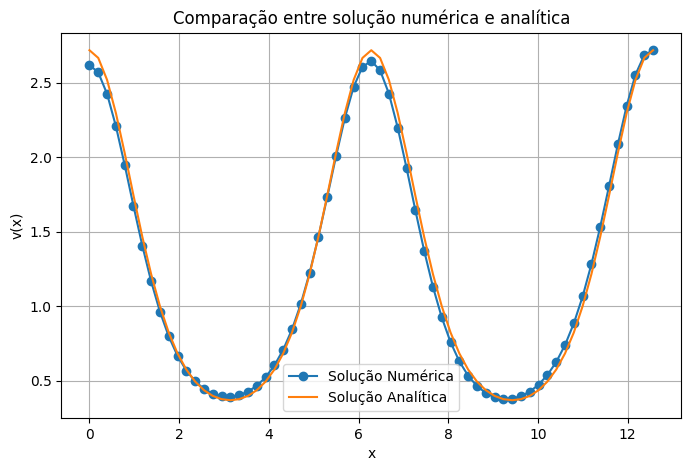

In [33]:
plt.figure(figsize=(8,5))
plt.plot(x, v, 'o-', label='Solução Numérica')
plt.plot(x, v_analitica, label='Solução Analítica')
plt.xlabel('x')
plt.ylabel('v(x)')
plt.legend()
plt.title('Comparação entre solução numérica e analítica')
plt.grid(True)
plt.show()